# Upload files in Google Colab
If you are running this Jupyter Notebook on Google Colab, run this cell to upload the data files (train_inputs.csv, train_targets.csv, test_inputs.csv, test_targets.csv) in the colab virtual machine.  You will be prompted to select files that you would like to upload. 

If you are running this Jupyter Notebook on your computer, you do not need to run this cell.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test_inputs.csv to test_inputs.csv
Saving test_labels.csv to test_labels.csv
Saving train_inputs.csv to train_inputs.csv
Saving train_labels.csv to train_labels.csv
sample_data/     test_labels.csv   train_labels.csv
test_inputs.csv  train_inputs.csv


# Import libraries 
Do not use any other Python library.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Function: load_logistic_regression_data

This function loads the data for Logistic Regression from a local drive into RAM

Outputs:

*   **train_inputs**: numpy array of N training data points x M features
*   **train_labels**: numpy array of N training labels
*   **test_inputs**: numpy array of N' test data points x M features
*   **test_labels**: numpy array of N' test labels

In [3]:
def load_logistic_regression_data():
  test_inputs = np.genfromtxt('test_inputs.csv', delimiter=',')
  test_labels = np.genfromtxt('test_labels.csv', delimiter=',')
  train_inputs = np.genfromtxt('train_inputs.csv', delimiter=',')
  train_labels = np.genfromtxt('train_labels.csv', delimiter=',')
  return train_inputs, train_labels, test_inputs, test_labels

# Function: sigmoid

This function implements the logistic sigmoid.

Input:
*   **input**: vector of inputs (numpy array of floats)

Output:
*   **output**: vector of outputs (numpy array of floats)

In [4]:
def sigmoid(input):
  output = 1/(1 + np.exp(-input))
  return output

# Function: predict_logistic_regression

This function uses a vector of weights to make predictions for a set of inputs.  The prediction for each data point is a distribution over the labels.  Assume that there are only two possible labels {0,1}.

Inputs:
*   **inputs**: matrix of input data points for which we want to make a prediction (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)

Output:
*   **predicted_probabilities**: matrix of predicted probabilities (numpy array of N data points x 2 labels)

In [5]:
def predict_logistic_regression(inputs, weights):
  probabilities = sigmoid(np.dot(weights, inputs.T)) 
  predicted_probabilities = np.array([probabilities, 1-probabilities]).T
  return predicted_probabilities 

# Function eval_logistic_regression

This function evaluates a set of predictions by computing the negative log probabilities of the labels and the accuracy (percentage of correctly predicted labels).  Assume that there are only two possible labels {0,1}.  A data point is correctly labeled when the probability of the target label is >= 0.5.

Inputs:
*   **inputs**: matrix of input data points for which we will evaluate the predictions (numpy array of N data points x M+1 features)
*   **weights**: vector of weights (numpy array of M+1 weights)
*   **labels**: vector of target labels associated with the inputs (numpy array of N labels)

Outputs:
*   **neg_log_prob**: negative log probability of the set of predictions (float)
*   **accuracy**: percentage of correctly labeled data points (float)

In [26]:
def eval_logistic_regression(inputs, weights, labels):
  predicted_labels = np.log(predict_logistic_regression(inputs, weights))
  accurate_labels = predict_logistic_regression(inputs, weights)
  accuracy = (np.count_nonzero(accurate_labels >= 0.5) / len(labels)) * 100

  neg_log_prob = 0

  for i in range(len(labels)):
    neg_log_prob += (labels[i]*predicted_labels[i,0]) + ((1-labels[i])* predicted_labels[i,1])

  return -neg_log_prob, accuracy

# Function: initialize_weights

This function initializes the weights uniformly at random in the interval [-0.01,0.01]

Input:
*   **n_weights**: # of weights to be initialized (integer)

Output:
*   **random_weights**: vector of weights (numpy array of floats)

In [7]:
def initialize_weights(n_weights):
  random_weights = np.random.uniform(-0.01,0.01,n_weights)
  return random_weights

# Function train_logistic_regression_gradient

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement gradient descent to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., gradient updates) reaches max_iters=10000.  Use learning_rate=0.0001. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)
*   **learning_rate**: learning rate that that multiplies the gradient in a weight update (default=0.0001)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [8]:
def train_logistic_regression_gradient(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1, learning_rate=0.0001):
  i = 0
  gradient_norm = gradient_norm_threshold + 1
  weights = initialize_weights(train_inputs.shape[1])
  
  while i <= max_iters and gradient_norm > gradient_norm_threshold:
    predicted_labels = predict_logistic_regression(train_inputs, weights)
    error_margin =  predicted_labels[:, 0] - train_labels
    
    gradient = np.dot(error_margin.T, train_inputs) + lambda_hyperparam * weights
    gradient_norm = np.linalg.norm(gradient)
    
    weights -= learning_rate * gradient
    i += 1
  return weights, i

# Function train_logistic_regression_newton

This function optimizes a set of weights for logistic regression based on a training set.  Initialize the weights with the function initialize_weights.  Implement Newton's algorithm to optimize the weights.  Stop the algorithm when the Euclidean norm of the gradient is less than gradient_norm_threshold=0.1 or the number of iterations (i.e., weight updates) reaches max_iters=10000. Assume that there are only two labels {0,1}.

Inputs:
*   **train_inputs**: matrix of input training points (numpy array of N data points x M+1 features)
*   **train_labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **lambda_hyperparam**: lambda hyperparameter used to adjust the importance of the regularizer (scalar)
*   **max_iters**: maximum number of iterations (i.e., number of weight updates) (default=10000)
*   **gradient_norm_threshold**: threshold for the Euclidean norm of the gradient.  When the norm of the gradient falls below this threshold, the algorithm is stopped. (default=0.1)

Output:
*   **weights**: vector of weights that have been optimized (numpy array of M+1 weights)
*   **n_iters**: number of iterations (i.e., number of weight updates)



In [9]:
def train_logistic_regression_newton(train_inputs, train_labels, lambda_hyperparam, max_iters=10000, gradient_norm_threshold=0.1):
  i = 0 
  gradient_norm = gradient_norm_threshold + 1
  weights = initialize_weights(train_inputs.shape[1])
  
  while i <= max_iters and gradient_norm > gradient_norm_threshold:
    predicted_labels = predict_logistic_regression(train_inputs, weights)
    error_margin =  predicted_labels[:, 0] - train_labels
    
    gradient =  np.dot(error_margin.T, train_inputs) + lambda_hyperparam * weights
    gradient_norm = np.linalg.norm(gradient)
    r = np.identity(train_inputs.shape[0])
    
    for i in range(train_inputs.shape[0]):
      r[i, i] = predicted_labels[i, 0] * predicted_labels[i, 1] 
    
    hessian = np.dot(train_inputs.T, np.dot(r, train_inputs)) + lambda_hyperparam * np.identity(train_inputs.shape[1])
    weights -= np.dot(np.linalg.inv(hessian), gradient)
    i += 1

  return weights, i

# Function cross_validation_logistic_regression

This function performs k-fold cross validation to determine the best lambda hyperparameter in logistic regression

Inputs:
*   **k_folds**: # of folds in cross-validation (integer)
*   **hyperparameters**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **inputs**: matrix of input points (numpy array of N data points by M+1 features)
*   **labels**: vector of labels associated with the inputs (numpy array of N labels)
*   **algorithm**: string in {'newton','gradient descent'}

Outputs:
*   **best_hyperparam**: best lambda value for logistic regression (float)
*   **best_neg_log_prob**: negative log probabilty achieved with best_hyperparam (float)
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)



In [10]:
def cross_validation_logistic_regression(k_folds, hyperparameters, inputs, labels, algorithm):
  label = np.array_split(labels, k_folds)
  fold = np.array_split(inputs, k_folds)
  neg_log_prob = np.array([])
  
  for hyper in hyperparameters:
    h_parameter_nl = 0
    accuracy = 0

    for i in range (k_folds):
      test_inputs = fold[i]
      test_labels = label[i]
      train_inputs = np.concatenate([fold[j] for j in range (k_folds) if j != i])
      train_labels = np.concatenate([label[j] for j in range (k_folds) if j != i])

      if algorithm == "gradient descent":
        [weights, n_iter] = train_logistic_regression_gradient(train_inputs, train_labels, hyper, 10000, 0.1, 0.0001)
      elif algorithm == "newton":  
        [weights, n_iter] = train_logistic_regression_newton(train_inputs, train_labels, hyper, 10000, 0.1)
      else:
        raise ValueError('Invalid algorithm: {}. Only "newton" and "gradient descent" are allowed.'.format(algorithm))   

      [nl, accuracy] = eval_logistic_regression(test_inputs, weights, test_labels)
      h_parameter_nl += nl

    neg_log_prob = np.append(neg_log_prob, h_parameter_nl/k_folds)
  
  a = neg_log_prob.argmin()
  best_hyperparam = hyperparameters[a]
  best_neg_log_prob = neg_log_prob[a]
  neg_log_probabilities = neg_log_prob
  return best_hyperparam, best_neg_log_prob, neg_log_probabilities

# Function: plot_logistic_regression_neg_log_probabilities

Function that plots the negative log probabilities for different lambda values (hyperparameters) in logistic regression based on cross validation

Inputs:
*   **neg_log_probabilities**: vector of negative log probabilities for the corresponding hyperparameters (numpy array of floats)
*   **hyperparams**: list of hyperparameters where each hyperparameter is a different lambda value (list of floats)
*   **algorithm**: string in {'newton','gradient descent'}

In [11]:
def plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,algorithm):
  plt.plot(hyperparams,neg_log_probabilities)
  plt.ylabel('negative log probability')
  plt.xlabel('lambda')
  plt.title(algorithm)
  plt.show()

# Main Logistic Regression code

Load data (rescale the inputs to be in the [-1,1] range, add 1 at the end of each datapoint and rename the labels 5,6 to 0,1).
Use k-fold cross validation to find the best lambda value for logistic regression.
Plot the negative log probabilities for different lambda values.
Test logistic regression with the best lambda value.

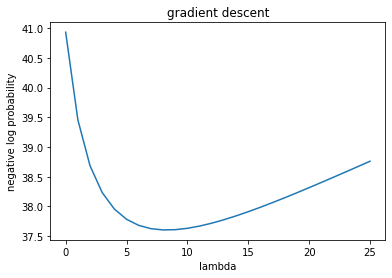

Gradient descent best lambda: 8
Gradient descent best cross validation negative log probability: 37.60475915995886
Gradient descent test accuracy: 100.0
Gradient descent test negative log probability: 33.285738454642704
Gradient descent # of iterations: 3101


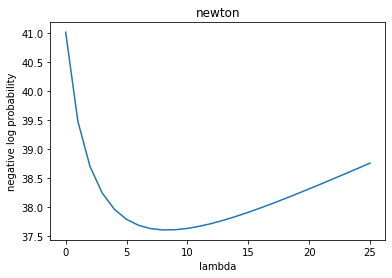

Newton best lambda: 8
Newton best cross validation negative log probability: 37.60806442833481
Newton test accuracy: 100.0
Newton test negative log probability: 33.29203077371129
Newton # of iterations: 1000


In [27]:
# load data
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

# rescale inputs in the [-1,1] range
train_inputs = (train_inputs - 8)/8
test_inputs = (test_inputs - 8)/8

# add 1 at the end of each data point
train_inputs = np.concatenate((train_inputs,np.ones((train_inputs.shape[0],1))),1)
test_inputs = np.concatenate((test_inputs,np.ones((test_inputs.shape[0],1))),1)

# rename the classes 5,6 to 0,1
train_labels = train_labels.astype(int) - 5
test_labels = test_labels.astype(int) - 5

###############################################
# logistic regression based on gradient descent
###############################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'gradient descent')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'gradient descent')
print('Gradient descent best lambda: ' + str(best_lambda))
print('Gradient descent best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_gradient(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Gradient descent test accuracy: ' + str(accuracy))
print('Gradient descent test negative log probability: ' + str(neg_log_prob))
print('Gradient descent # of iterations: ' + str(n_iters))

#################################################
# logistic regression based on Newton's algorithm
#################################################

# lambda values to be evaluated by cross validation
hyperparams = range(26)
k_folds = 10
best_lambda, best_neg_log_prob, neg_log_probabilities = cross_validation_logistic_regression(k_folds,hyperparams,train_inputs,train_labels,'newton')

# plot results
plot_logistic_regression_neg_log_probabilities(neg_log_probabilities,hyperparams,'newton')
print('Newton best lambda: ' + str(best_lambda))
print('Newton best cross validation negative log probability: ' + str(best_neg_log_prob))

# train and evaluate with best lambda
weights, n_iters = train_logistic_regression_newton(train_inputs,train_labels,best_lambda)
neg_log_prob, accuracy = eval_logistic_regression(test_inputs, weights, test_labels)
print('Newton test accuracy: ' + str(accuracy))
print('Newton test negative log probability: ' + str(neg_log_prob))
print('Newton # of iterations: ' + str(n_iters))


**Question 1:**
Gradient Decent Algorithm has a time complexity    
O(n) 'linear time' and a space complexity of O(1) 'constant time'. Best case applications would be for linear regression problems with large datasets because of its simplicity and computational efficency

Newton's Algorithm would typically have a time complexity of O(d^3) 'cubic time' with d being the number of dimensions and a space complexity of O(d^2) 'quadratic time'. This would be best applied on linear regression problems where the cost function is smooth and the gradient and hessian can be easily computed.

**Question 2:**
Logistic regression find a linear sperator menaing it finds the best hyperplane to seperate data into classes. Where as KNN finds a non-linear seperator by using the majority class of the k nearest neighbors for a given datapoint.

The performance for each seperator depends on the given dataset where logostic regression would perform best when the features and target relationship is linear. KNN does the opposite and perfroms best when the relationship is non-linear, while it can handle any type of data it is computationally expensive to interpret other types of data.

**Question 3:**
The plot_boundary function in the code creates a meshgrid of x and y values and then calculates a boundary between two classes based on the weights and bias of the logistic regression model. If the boundary separates the two classes well, it suggests that the classes are linearly separable. The visualization of the boundary can give you an idea of how well the model is separating the two classes.





In [ ]:
#Question 3

# Load your dataset
train_inputs, train_labels, test_inputs, test_labels = load_logistic_regression_data()

X = train_inputs 
y = train_labels

# Fit a logistic regression model
weights = np.zeros(X.shape[1])  # Initialize weights
#weights = weights.reshape(-1, 1)
bias = 0  # Initialize bias
learning_rate = 0.01  # Set learning rate

# Train the model using gradient descent
for i in range(100):
    # Calculate the predicted probabilities for each data point
    z = X.dot(weights) + bias
    predictions = 1 / (1 + np.exp(-z))

    # Calculate the error for each data point
    error = predictions - y

    # Update the weights and bias using gradient descent
    weights = weights - learning_rate * X.T.dot(error)
    bias = bias - learning_rate * np.sum(error)

# Plot the data and the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid = np.c_[xx.ravel(), yy.ravel()]
weights = weights.reshape(-1,1)
z = grid.dot(weights.shape)
probs = 1 / (1 + np.exp(-z))
probs = probs.reshape(xx.shape)

plt.contourf(xx, yy, probs, alpha=0.3)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()